In [1]:
import data_loader
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
init_train = data_loader.load_train_data("../data/adult.data", valid_rate=1, is_df = "True")
test = data_loader.load_test_data("../data/adult.test", is_df = "True")
train = init_train[1]

## 1. Data preprocessing

### Replacing all column indices with attribute names

We printed the dataframe and we noticed that column values were numbers, so we replaced with the attribute names for better readability.

In [2]:
col_map = ["age", "workclass", "final_weight", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "cap_gain", "cap_loss", "hrs_p_week","country","income"]
train.columns = col_map
test.columns = col_map

### Printing train and test data

In [3]:
train.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrs_p_week,country,income
24337,62,Local-gov,68268,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
17049,50,Private,215990,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
21016,36,Private,185405,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
2790,64,Private,258006,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,Cuba,<=50K
13511,28,Self-emp-not-inc,39388,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K


In [4]:
test.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrs_p_week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


It seems that in test data, the income class has a '.' at the end. Remove it in data cleaning phase

### Columns in the data

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 24337 to 10137
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
final_weight      32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
cap_gain          32561 non-null int64
cap_loss          32561 non-null int64
hrs_p_week        32561 non-null int64
country           32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None


### Converting other columns to categorical for both train and test data

In [6]:
train = pd.concat([
        train.select_dtypes(['object']).apply(pd.Series.astype, dtype = 'category'),
        train.select_dtypes([], ['object'])
        ], axis = 1).reindex(train.columns, axis = 1)

test = pd.concat([
        test.select_dtypes(['object']).apply(pd.Series.astype, dtype = 'category'),
        test.select_dtypes([],['object'])
        ], axis = 1).reindex(test.columns, axis = 1)

In [7]:
print(train.workclass.dtype)

category


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 24337 to 10137
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null category
final_weight      32561 non-null int64
education         32561 non-null category
education_num     32561 non-null int64
marital_status    32561 non-null category
occupation        32561 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
cap_gain          32561 non-null int64
cap_loss          32561 non-null int64
hrs_p_week        32561 non-null int64
country           32561 non-null category
income            32561 non-null category
dtypes: category(9), int64(6)
memory usage: 2.0 MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null category
final_weight      16281 non-null int64
education         16281 non-null category
education_num     16281 non-null int64
marital_status    16281 non-null category
occupation        16281 non-null category
relationship      16281 non-null category
race              16281 non-null category
sex               16281 non-null category
cap_gain          16281 non-null int64
cap_loss          16281 non-null int64
hrs_p_week        16281 non-null int64
country           16281 non-null category
income            16281 non-null category
dtypes: category(9), int64(6)
memory usage: 910.7 KB


### Summary of numerical data

#### Training data

In [10]:
train.describe()

,age,final_weight,education_num,cap_gain,cap_loss,hrs_p_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Test data

In [11]:
test.describe()

,age,final_weight,education_num,cap_gain,cap_loss,hrs_p_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


## Checking if numerical columns are correlated

In [12]:
print(train.corr())

                    age  final_weight  education_num  cap_gain  cap_loss  \
age            1.000000     -0.076646       0.036527  0.077674  0.057775   
final_weight  -0.076646      1.000000      -0.043195  0.000432 -0.010252   
education_num  0.036527     -0.043195       1.000000  0.122630  0.079923   
cap_gain       0.077674      0.000432       0.122630  1.000000 -0.031615   
cap_loss       0.057775     -0.010252       0.079923 -0.031615  1.000000   
hrs_p_week     0.068756     -0.018768       0.148123  0.078409  0.054256   

               hrs_p_week  
age              0.068756  
final_weight    -0.018768  
education_num    0.148123  
cap_gain         0.078409  
cap_loss         0.054256  
hrs_p_week       1.000000  


As none of the numerical columns in the training data are correlated, we cannot drop any of them.

## 2. Data cleaning

Removing the . at the end of income class in test data

In [13]:
test["income"] = test["income"].map(lambda x:x.rstrip('.'))

In [14]:
test.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrs_p_week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Also, every categorical data entry has a space at the beginning(for both train and test data), lets remove that too.

In [15]:
for col in train.columns:
    if(train[col].dtype != "int64"):
        train[col] = train[col].map(lambda x:x.lstrip(' '))
        
for col in test.columns:
    if(test[col].dtype != "int64"):
        test[col] = test[col].map(lambda x:x.lstrip(' '))

### Removing missing Values
We now noticed that the training dataset had missing values and we counted the no of missing values for every column. After finding out the columns that missing values, we removed those corresponding rows. It was approximately around 2000 and did not alter the dataset much.

#### No of missing rows per column in training data

In [16]:
for column in train.columns:
    su = (train[column] == '?').sum()
    if su > 0:
        print("Column: ", column, " Count of ?: ",su)

Column:  workclass  Count of ?:  1836
Column:  occupation  Count of ?:  1843
Column:  country  Count of ?:  583


C:\Users\Karan\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


#### Removing the rows with missing entries

In [17]:
train = train[((train.country != '?') & (train.workclass != '?') & (train.occupation != '?'))]

In [18]:
print(train.workclass.value_counts())

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            0
?                       0
Name: workclass, dtype: int64


#### No of missing rows per column in test data

In [19]:
for column in test.columns:
    su = (test[column] == '?').sum()
    if su > 0:
        print("Column: ",column, " Count of ?: ",su)

Column:  workclass  Count of ?:  963
Column:  occupation  Count of ?:  966
Column:  country  Count of ?:  274


#### Removing the rows with missing entries

In [20]:
test = test[((test.country != '?') & (test.workclass != '?') & (test.occupation != '?'))]

In [21]:
print(test.workclass.value_counts())

Private             11021
Self-emp-not-inc     1297
Local-gov            1033
State-gov             667
Self-emp-inc          572
Federal-gov           463
Without-pay             7
Never-worked            0
?                       0
Name: workclass, dtype: int64


### Dropping the '?' category from workclass, occupation and country columns

In [22]:
train.workclass = train.workclass.cat.remove_categories('?')
train.occupation = train.occupation.cat.remove_categories('?')
train.country = train.country.cat.remove_categories('?')

test.workclass = test.workclass.cat.remove_categories('?')
test.occupation = test.occupation.cat.remove_categories('?')
test.country = test.country.cat.remove_categories('?')

In [23]:
print(train.workclass.value_counts())

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            0
Name: workclass, dtype: int64


In [24]:
print(train.head())

       age         workclass  final_weight     education  education_num  \
24337   62         Local-gov         68268       HS-grad              9   
17049   50           Private        215990       HS-grad              9   
21016   36           Private        185405       HS-grad              9   
2790    64           Private        258006  Some-college             10   
13511   28  Self-emp-not-inc         39388     Assoc-voc             11   

           marital_status        occupation   relationship   race     sex  \
24337  Married-civ-spouse  Transport-moving        Husband  White    Male   
17049  Married-civ-spouse      Craft-repair        Husband  White    Male   
21016  Married-civ-spouse      Adm-clerical        Husband  White    Male   
2790              Widowed      Adm-clerical  Not-in-family  White  Female   
13511  Married-civ-spouse   Farming-fishing        Husband  White    Male   

       cap_gain  cap_loss  hrs_p_week        country income  
24337         0         

### Mapping education with education_num:

We analyzed the dataset and found that the columns education and education number had a one-to-one mapping. Thus we have extracted this one-to-one mapping relationship into a dictionary called edu_map and later will remove the education_num column from the dataset.

In [25]:
edu = train[['education','education_num']]
edu_map = edu.drop_duplicates().set_index('education_num').to_dict()['education']

### Mapping the income classes as -1 and 1

In [26]:
train['income'] = train['income'].map({ "<=50K": -1, ">50K": 1})

## 3. Data Visualization

Now we move onto visualizing each of the categorical columns and try to find how each is(or isn't) related to the income being <=50K or >50K 

In [38]:
class_0 = -1
class_1 = 1

category


### 3.1 Workclass vs Income

C:\Users\Karan\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


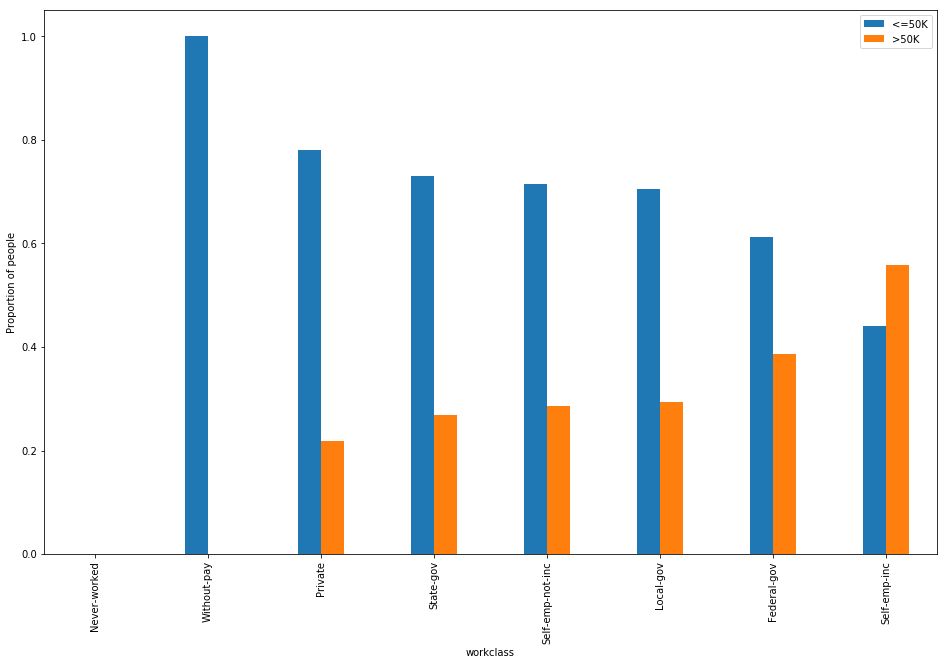

In [45]:
# Counting rows wrt workclass and incomes
work_income_c = train.groupby(['workclass','income']).count()['age']
work_income_c = work_income_c.unstack('income').fillna(0)

# Calculating the proportion of people in each income class for each education level
sum_in = (work_income_c[class_0] + work_income_c[class_1])

temp = work_income_c[class_0] / sum_in
work_income_c[class_1] = work_income_c[class_1] / sum_in
work_income_c[class_0] = temp

work_income_c = work_income_c.fillna(0).sort_values(by=[class_1])
#print(work_income_c)

fig, axes = plt.subplots()
axes.set_ylabel('Proportion of people')
work_income_c.plot.bar(ax = axes, figsize = (16,10), width = 0.4)
axes.legend(["<=50K",">50K"])
fig.show()

### 3.2 Education vs Income

C:\Users\Karan\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


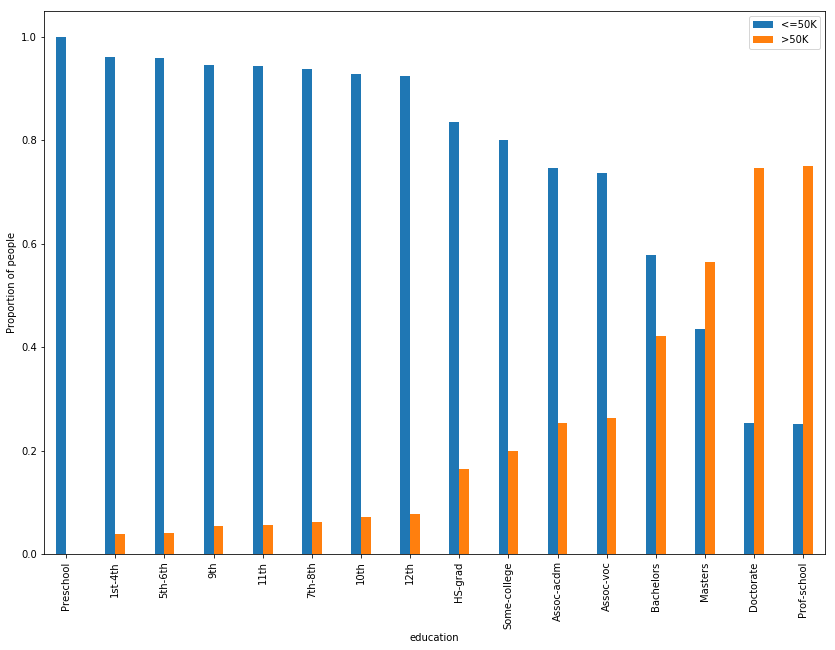

In [50]:
# Counting rows wrt education and incomes
edu_income_c = train.groupby(['education','income']).count()['age']
edu_income_c = edu_income_c.unstack('income').fillna(0)

# Calculating the proportion of people in each income class for each education level
sum_in = (edu_income_c[class_0] + edu_income_c[class_1])

temp = edu_income_c[class_0] / sum_in
edu_income_c[class_1] = edu_income_c[class_1] / sum_in
edu_income_c[class_0] = temp

edu_income_c = edu_income_c.fillna(0).sort_values(by=[class_1])
#print(edu_income_c)

fig, axes = plt.subplots()
axes.set_ylabel('Proportion of people')
edu_income_c.plot.bar(ax = axes, figsize = (14,10), width = 0.4)
axes.legend(["<=50K",">50K"])
fig.show()

We see that, as expected, the proportion of people earning more than 50K increases as people tend to attain higher levels of education. But, not until completing a Masters degree do people earning more than 50K exceed people earning less than 50K.

### 3.3 Race vs Income

C:\Users\Karan\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


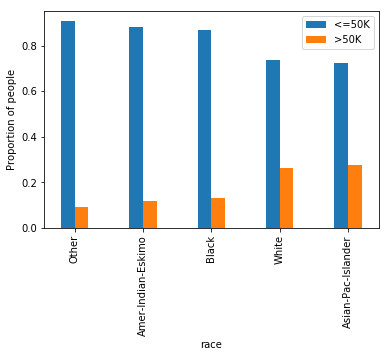

In [52]:
# Counting rows wrt education and incomes
race_income_c = train.groupby(['race','income']).count()['age']
race_income_c = race_income_c.unstack('income').fillna(0)

# Calculating the proportion of people in each income class for each education level
sum_in = (race_income_c[class_0] + race_income_c[class_1])

temp = race_income_c[class_0] / sum_in
race_income_c[class_1] = race_income_c[class_1] / sum_in
race_income_c[class_0] = temp

race_income_c = race_income_c.fillna(0).sort_values(by=[class_1])
#print(edu_income_c)

fig, axes = plt.subplots()
axes.set_ylabel('Proportion of people')
race_income_c.plot.bar(ax = axes, width = 0.4)
axes.legend(["<=50K",">50K"])
fig.show()

### Feature cleaning

In [30]:
#train.drop(columns="education", inplace=True)

In [31]:
#train['income'] = train['income'].map({ " <=50K": -1, " >50K": 1})
#Results = np.copy(train['income'].values)
#train.drop(columns="income",inplace=True)